In [44]:
import numpy as np
import os
import glob
from python_speech_features import mfcc, logfbank, get_filterbanks, lifter
from python_speech_features.sigproc import preemphasis, framesig, powspec
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Bidirectional, Dropout, Masking, TimeDistributed, Conv1D, Flatten, Reshape, Lambda, Concatenate
from keras.optimizers import SGD
from keras import backend as K
from keras.engine.topology import Layer
from keras import metrics

import scipy.io.wavfile as wav
import sys
import subprocess
import h5py
import matplotlib.pyplot as plt

In [2]:
source_dir = '/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN'
target_dir = '/home/tvniedek/TIMIT/TRAIN'

In [5]:
drs = sorted(glob.glob(os.path.join(source_dir, 'DR*')))
cmd = "sox {0} -t wav {1}"

winlen = 0.025
winstep = 0.01

preemph_in = []
preemph_out = []
#fft_out = []
log_fbanks_out = []
#log_energy_out = []
#lifter_out = []
# mfcc_out = []
# log_fbanks_out_2 = []

for dialect_region_dir in drs:
    print(dialect_region_dir)
    dr = os.path.split(dialect_region_dir)[-1]
    for speaker_dir in sorted(glob.glob(os.path.join(dialect_region_dir, "*"))):
        speaker = os.path.split(speaker_dir)[-1]
        print(speaker_dir)
        for audio_file in sorted(glob.glob(os.path.join(speaker_dir, "*.WAV"))):
            fname = os.path.splitext(os.path.split(audio_file)[-1])[0]
            if fname[8:10] == "SA":
                continue
            print(audio_file)
            file_target_dir = os.path.join(target_dir, dr, speaker)
            if not os.path.exists(file_target_dir):
                os.makedirs(file_target_dir)

            # Convert NIST wav files using sox
            converted_target_file = os.path.join(file_target_dir, os.path.split(audio_file)[-1])
            if not os.path.isfile(converted_target_file):
                subprocess.call(cmd.format(audio_file, converted_target_file), shell=True)

            (rate, sig) = wav.read(converted_target_file)
            #y = logfbank(sig, rate, winlen=winlen, winstep=winstep)
            #for frame in y:
            #    log_fbanks_out_2.append(frame)
            
            #print(sig.shape)
            
            # Convert to overlapping frames
            x = framesig(sig, winlen * rate, winstep * rate)
            
            # Pre-emphasis
            sig_preemph = preemphasis(sig)
            
            # Convert to overlapping frames
            y = framesig(sig_preemph, winlen * rate, winstep * rate)
            
            for frame in x:
                preemph_in.append(frame)
                
            for frame in y:
                preemph_out.append(frame)
            
            #for frame in y:
            #    fft_in.append(frame)
            
            # Do fft
            y = powspec(y, 512)
            
            #for frame in y:
            #    fft_out.append(frame)
                
            energy = np.sum(y,1) # this stores the total energy in each frame
            log_energy = np.log(np.where(energy == 0, np.finfo(float).eps,energy)) # if energy is zero, we get problems with log
            
            #for frame in log_energy:
            #    log_energy_out.append(frame)
            
            fbanks = get_filterbanks(26, 512, rate, 0, None)
            # Comput logfbanks
            y = np.dot(y, fbanks.T)
            y = np.log(np.where(y == 0,np.finfo(float).eps,y))
            
            for frame in y:
                log_fbanks_out.append(frame)

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SI1027.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SI1657.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SI648.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SX127.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SX217.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SX307.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SX37.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FCJF0/DR1FCJF0SX397.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FDAW0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FDAW0/DR1FDAW0SI1271.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FDAW0/DR1FDAW0SI

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FTBR0/DR1FTBR0SX21.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FTBR0/DR1FTBR0SX291.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FTBR0/DR1FTBR0SX381.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SI1032.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SI1510.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SI2292.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SX132.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SX222.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SX312.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SX402.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/FVFB0/DR1FVFB0SX42.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SI1709.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SI2339.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SX179.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SX269.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SX359.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SX449.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMGG0/DR1MMGG0SX89.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMRP0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMRP0/DR1MMRP0SI2034.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMRP0/DR1MMRP0SI717.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMRP0/DR1MMRP0SI774.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MMRP0/DR1MMRP0SX144.WAV
/vol/bigdata2/smurfland_archive/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SI1548.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SI2178.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SI918.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SX108.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SX18.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SX198.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SX288.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MTRR0/DR1MTRR0SX378.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MWAD0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MWAD0/DR1MWAD0SI1062.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR1/MWAD0/DR1MWAD0SI1749.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/T

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FJKL0/DR2FJKL0SX32.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FJKL0/DR2FJKL0SX392.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SI1208.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SI1838.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SI578.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SX128.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SX218.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SX308.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SX38.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FKAA0/DR2FKAA0SX398.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/FLMA0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAI

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SI2072.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SI812.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SX182.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SX272.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SX362.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SX452.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCEW0/DR2MCEW0SX92.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCTM0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCTM0/DR2MCTM0SI1350.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCTM0/DR2MCTM0SI1980.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCTM0/DR2MCTM0SI720.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MCTM0/DR2MCTM0SX180.WAV
/vol/bigdata2/smurfland_archive/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MHRM0/DR2MHRM0SX58.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SI1524.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SI1999.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SI2154.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SX174.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SX264.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SX354.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SX444.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJAE0/DR2MJAE0SX84.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJBG0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MJBG0/DR2MJBG0SI1232.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TR

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKDT0/DR2MKDT0SI893.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKDT0/DR2MKDT0SX173.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKDT0/DR2MKDT0SX263.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKDT0/DR2MKDT0SX353.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKDT0/DR2MKDT0SX443.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKDT0/DR2MKDT0SX83.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKJO0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKJO0/DR2MKJO0SI1517.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKJO0/DR2MKJO0SI2147.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKJO0/DR2MKJO0SI887.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKJO0/DR2MKJO0SX167.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MKJO0/DR2MKJO0SX257.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRHL0/DR2MRHL0SI885.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRHL0/DR2MRHL0SX165.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRHL0/DR2MRHL0SX255.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRHL0/DR2MRHL0SX345.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRHL0/DR2MRHL0SX435.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRHL0/DR2MRHL0SX75.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRJH0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRJH0/DR2MRJH0SI1519.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRJH0/DR2MRJH0SI889.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRJH0/DR2MRJH0SI914.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRJH0/DR2MRJH0SX169.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MRJH0/DR2MRJH0SX259.WAV
/vol/bigdata2/smurfland_archive/da

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MWSB0/DR2MWSB0SX186.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MWSB0/DR2MWSB0SX276.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MWSB0/DR2MWSB0SX366.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MWSB0/DR2MWSB0SX6.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MWSB0/DR2MWSB0SX96.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0/DR2MZMB0SI1166.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0/DR2MZMB0SI1796.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0/DR2MZMB0SI536.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0/DR2MZMB0SX176.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0/DR2MZMB0SX266.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR2/MZMB0/DR2MZMB0SX356.WAV
/vol/bigdata2/smurfland_archive/dat

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SI2161.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SI901.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SX181.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SX271.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SX361.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SX451.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLAC0/DR3FLAC0SX91.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLJD0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLJD0/DR3FLJD0SI1516.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLJD0/DR3FLJD0SI2146.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLJD0/DR3FLJD0SI886.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/FLJD0/DR3FLJD0SX166.WAV
/vol/bigdata2/smurfland_archive/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MAPV0/DR3MAPV0SX213.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MAPV0/DR3MAPV0SX303.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MAPV0/DR3MAPV0SX33.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MAPV0/DR3MAPV0SX393.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SI1281.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SI1911.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SI651.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SX111.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SX201.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SX21.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MBEF0/DR3MBEF0SX291.WAV
/vol/bigdata2/smurfland_archive/da

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDNS0/DR3MDNS0SX201.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDNS0/DR3MDNS0SX21.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDNS0/DR3MDNS0SX291.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDNS0/DR3MDNS0SX381.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SI1327.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SI1713.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SI697.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SX157.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SX247.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SX337.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MDSS1/DR3MDSS1SX427.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SI1012.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SI1642.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SI2272.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SX112.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SX202.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SX22.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SX292.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJLG1/DR3MJLG1SX382.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJRH1
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJRH1/DR3MJRH1SI1558.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MJRH1/DR3MJRH1SI1774.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRBC0/DR3MRBC0SX239.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRBC0/DR3MRBC0SX329.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRBC0/DR3MRBC0SX419.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRBC0/DR3MRBC0SX59.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SI1167.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SI1797.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SI537.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SX177.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SX267.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SX357.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MRDS0/DR3MRDS0SX447.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MTPP0/DR3MTPP0SX158.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MTPP0/DR3MTPP0SX248.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MTPP0/DR3MTPP0SX338.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MTPP0/DR3MTPP0SX428.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MTPP0/DR3MTPP0SX68.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0/DR3MVJH0SI1556.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0/DR3MVJH0SI2186.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0/DR3MVJH0SI926.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0/DR3MVJH0SX116.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0/DR3MVJH0SX206.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR3/MVJH0/DR3MVJH0SX26.WAV
/vol/bigdata2/smurfland_archive/da

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FKLC0/DR4FKLC0SX175.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FKLC0/DR4FKLC0SX265.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FKLC0/DR4FKLC0SX355.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FKLC0/DR4FKLC0SX445.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FKLC0/DR4FKLC0SX85.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0/DR4FLHD0SI1344.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0/DR4FLHD0SI1827.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0/DR4FLHD0SI1974.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0/DR4FLHD0SX174.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0/DR4FLHD0SX264.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/FLHD0/DR4FLHD0SX354.WAV
/vol/bigdata2/smurfland_archive/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SI1238.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SI1430.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SI2060.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SX170.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SX260.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SX350.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SX440.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MDMA0/DR4MDMA0SX80.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MESG0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MESG0/DR4MESG0SI1332.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MESG0/DR4MESG0SI1962.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJJJ0/DR4MJJJ0SX263.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJJJ0/DR4MJJJ0SX353.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJJJ0/DR4MJJJ0SX443.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJJJ0/DR4MJJJ0SX83.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SI1616.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SI2246.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SI986.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SX176.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SX266.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SX356.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MJLB0/DR4MJLB0SX446.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SI1225.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SI1855.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SI595.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SX145.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SX235.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SX325.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SX415.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJC0/DR4MLJC0SX55.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJH0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJH0/DR4MLJH0SI1324.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MLJH0/DR4MLJH0SI1422.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/T

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRFL0/DR4MRFL0SX256.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRFL0/DR4MRFL0SX346.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRFL0/DR4MRFL0SX436.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRFL0/DR4MRFL0SX76.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SI1162.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SI1792.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SI532.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SX172.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SX262.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SX416.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR4/MRGM0/DR4MRGM0SX442.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FCDR1/DR5FCDR1SX16.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FCDR1/DR5FCDR1SX196.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FCDR1/DR5FCDR1SX286.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FCDR1/DR5FCDR1SX376.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SI1197.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SI567.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SI714.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SX117.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SX207.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SX27.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FDMY0/DR5FDMY0SX297.WAV
/vol/bigdata2/smurfland_archive/dat

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SI1783.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SI523.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SX163.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SX196.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SX253.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SX343.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FPMY0/DR5FPMY0SX73.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FSAG0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FSAG0/DR5FSAG0SI1323.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FSAG0/DR5FSAG0SI1953.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FSAG0/DR5FSAG0SI693.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/FSAG0/DR5FSAG0SX153.WAV
/vol/bigdata2/smurfland_archive/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDHL0/DR5MDHL0SX449.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDHL0/DR5MDHL0SX89.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SI1462.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SI2092.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SI832.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SX112.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SX22.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SX292.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SX382.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDSJ0/DR5MDSJ0SX438.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MDWH0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAI

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJPG0/DR5MJPG0SX381.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SI1366.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SI1996.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SI736.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SX106.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SX16.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SX286.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SX352.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJRG0/DR5MJRG0SX376.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJWG0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MJWG0/DR5MJWG0SI2155.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TR

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRKM0/DR5MRKM0SX367.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRKM0/DR5MRKM0SX7.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRKM0/DR5MRKM0SX97.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SI1594.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SI2224.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SI964.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SX154.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SX244.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SX334.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SX424.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MRLD0/DR5MRLD0SX64.WAV
/vol/bigdata2/smurfland_archive/data

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWEM0/DR5MWEM0SX420.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWEM0/DR5MWEM0SX60.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SI1426.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SI2266.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SI796.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SX166.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SX256.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SX346.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SX436.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR5/MWSH0/DR5MWSH0SX76.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/FTAJ0/DR6FTAJ0SX249.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/FTAJ0/DR6FTAJ0SX339.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/FTAJ0/DR6FTAJ0SX429.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/FTAJ0/DR6FTAJ0SX69.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SI1620.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SI2041.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SI781.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SX151.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SX241.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SX331.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MABC0/DR6MABC0SX421.WAV
/vol/bigdata2/smurfland_archive/d

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRMB0/DR6MRMB0SX51.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SI1585.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SI2215.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SI955.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SX145.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SX235.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SX325.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SX415.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MRXB0/DR6MRXB0SX55.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MSAT1
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR6/MSAT1/DR6MSAT1SI1073.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRA

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJEN0/DR7FJEN0SX147.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJEN0/DR7FJEN0SX237.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJEN0/DR7FJEN0SX327.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJEN0/DR7FJEN0SX417.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJEN0/DR7FJEN0SX57.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0/DR7FJHK0SI1022.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0/DR7FJHK0SI1652.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0/DR7FJHK0SI2282.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0/DR7FJHK0SX122.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0/DR7FJHK0SX212.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FJHK0/DR7FJHK0SX302.WAV
/vol/bigdata2/smurfland_archive/

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FVKB0/DR7FVKB0SX349.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FVKB0/DR7FVKB0SX439.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/FVKB0/DR7FVKB0SX79.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SI1295.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SI1798.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SI538.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SX178.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SX268.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SX358.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SX448.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MADD0/DR7MADD0SX88.WAV
/vol/bigdata2/smurfland_archive/da

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDED0/DR7MDED0SX450.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDED0/DR7MDED0SX90.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SI1066.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SI1696.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SI2326.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SX166.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SX256.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SX346.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SX436.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDKS0/DR7MDKS0SX76.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MDLC1
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRA

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MHXL0/DR7MHXL0SX152.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MHXL0/DR7MHXL0SX242.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MHXL0/DR7MHXL0SX332.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MHXL0/DR7MHXL0SX422.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MHXL0/DR7MHXL0SX62.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0/DR7MJAI0SI1604.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0/DR7MJAI0SI682.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0/DR7MJAI0SI710.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0/DR7MJAI0SX164.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0/DR7MJAI0SX254.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MJAI0/DR7MJAI0SX344.WAV
/vol/bigdata2/smurfland_archive/da

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MPFU0/DR7MPFU0SX358.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MPFU0/DR7MPFU0SX448.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MPFU0/DR7MPFU0SX88.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SI1591.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SI511.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SI961.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SX151.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SX241.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SX331.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SX421.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MREM0/DR7MREM0SX61.WAV
/vol/bigdata2/smurfland_archive/dat

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SI1477.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SI847.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SX127.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SX217.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SX307.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SX37.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTLC0/DR7MTLC0SX397.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTML0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTML0/DR7MTML0SI1065.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTML0/DR7MTML0SI1695.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTML0/DR7MTML0SI2325.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR7/MTML0/DR7MTML0SX165.WAV
/vol/bigdata2/smurfland_archive

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FJRB0/DR8FJRB0SX42.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SI1257.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SI1887.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SI627.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SX177.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SX267.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SX357.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SX447.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FKLH0/DR8FKLH0SX87.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FMBG0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/FMBG0/DR8FMBG0SI1160.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRA

/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMLM0/DR8MMLM0SX87.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SI1061.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SI1691.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SI2321.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SX161.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SX251.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SX341.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SX431.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMPM0/DR8MMPM0SX71.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMWS0
/vol/bigdata2/smurfland_archive/databases/TIMIT/TRAIN/DR8/MMWS0/DR8MMWS0SI1518.WAV
/vol/bigdata2/smurfland_archive/databases/TIMIT/TR

In [134]:
def preemphasis_model():
    model = Sequential()
    model.add(Conv1D(128, 5, activation='relu', padding='same', input_shape=(400, 1)))
    model.add(Conv1D(1, 1, padding='same'))
    model.add(Flatten())
    sgd = SGD(lr=0.05)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])
    return model

In [6]:
preemph_in = np.asarray(preemph_in)
preemph_out = np.asarray(preemph_out)

preemph_in_mean = np.mean(preemph_in)
preemph_in_std = np.std(preemph_in)
preemph_out_mean = np.mean(preemph_out)
preemph_out_std = np.std(preemph_out)

p_norm_in = (preemph_in) / preemph_in_std
p_norm_out = (preemph_out) / preemph_out_std

In [7]:
log_fbanks_out = np.asarray(log_fbanks_out)

In [26]:
np.float32(1)

1.0

In [31]:
class FftLayer(Layer):
    def __init__(self, NFFT=512, **kwargs):
        self._NFFT = NFFT
        super(FftLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        np_we =  np.zeros((self._NFFT, input_shape[1], 2), dtype=np.float32)
        for k in range(0, self._NFFT):
            for n in range(0, input_shape[1]):
                w = np.exp(-1j*k*n*((2*np.pi)/self._NFFT))
                np_we[k, n, 0]  = w.real
                np_we[k, n, 1] = w.imag
        self.we = K.variable(np_we.transpose(2,1,0), dtype='float32')
        self._trainable_weights.append(self.we)
        super(FftLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        sum_real = K.dot(x, self.we[0])
        sum_imag = K.dot(x, self.we[1])
        aggregated = K.stack([sum_real, sum_imag], axis=1)        
        out_agg = K.sum(K.square(aggregated), axis=1)
        return out_agg[:,:257] * np.float32(1.0 / self._NFFT)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 257)

In [138]:
def fft_model(norm_constant):
    model = Sequential()
    model.add(Lambda(lambda x:x*norm_constant, input_shape=(400,)))
    model.add(FftLayer(trainable=False))
    sgd = SGD(lr=0.05)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])
    return model

In [140]:
combined = preemphasis_model()
combined.set_weights(layers_preemph.get_weights())
combined.add(fft_layers)
combined.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05), metrics=[metrics.mae, metrics.mse])
combined.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, 400, 128)          768       
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 400, 1)            129       
_________________________________________________________________
flatten_15 (Flatten)         (None, 400)               0         
_________________________________________________________________
sequential_26 (Sequential)   (None, 257)               409600    
Total params: 410,497
Trainable params: 897
Non-trainable params: 409,600
_________________________________________________________________


In [141]:
y_pred = combined.predict(np.expand_dims(p_norm_in[:2], axis=2))

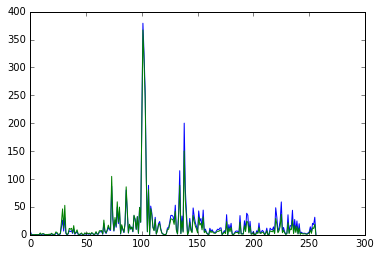

In [142]:
plt.plot(y_pred[0])
plt.plot(fft_out[0])
plt.show()

In [325]:
def filterbank_model():
    model = Sequential()
    model.add(Lambda(lambda x: K.log(x + 0.01), input_shape=(257, )))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(26, activation='linear'))
    
    sgd = SGD(lr= 0.001)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])
    return model

In [187]:
y_pred = layers_filterbanks.predict(fft_out[:100])
y_pred_linear = layers_filterbanks_linear.predict(fft_out[:100])

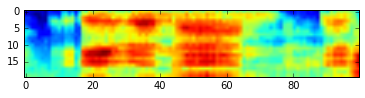

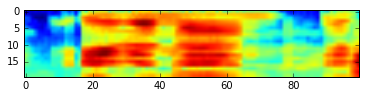

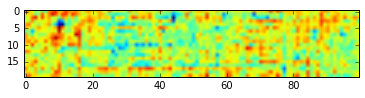

In [189]:
plt.imshow(y_pred.T)
plt.show()
plt.imshow(log_fbanks_out[:100].T)
plt.show()
plt.imshow(y_pred.T - log_fbanks_out[:100].T)
plt.show()

In [40]:
class DCTLayer(Layer):
    def __init__(self, numcep=13, norm=None, **kwargs):
        self._numcep = numcep
        self._norm = norm
        super(DCTLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self._N = input_shape[1]
        np_we =  np.zeros((self._N, self._N))
        for k in range(0, self._N):
            for n in range(0, self._N):
                w = np.cos((np.pi / self._N) * (n+0.5) * k)
                np_we[n, k] = w
        self.we = K.variable(np_we)
        self._trainable_weights.append(self.we)
        super(DCTLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):        
        dct_out = 2 * K.dot(x, self.we)
        dct_out = dct_out[:,:self._numcep]
        if self._norm == 'ortho':
            norm_0 = K.expand_dims(dct_out[:, 0] * K.sqrt(K.constant(1.0 / (4.0 * self._N), dtype='float32')), axis=1)
            norm_ = dct_out[:, 1:] * K.sqrt(K.constant(1.0 / (2.0 * self._N), dtype='float32'))
            dct_out = K.concatenate([norm_0, norm_], axis=1)
        return dct_out

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self._numcep)

In [205]:
log_energy_out = np.asarray(log_energy_out)

In [330]:
def energy_model():
    model = Sequential()
    model.add(Dense(1, activation='linear', input_dim=257, kernel_initializer='ones', bias_initializer='zeros'))
    model.add(Lambda(lambda x: K.log(x)))
    sgd = SGD(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])
    return model

In [222]:
model_energy.fit(fft_out, log_energy_out)

Epoch 1/10
 453344/1128519 [===========>..................] - ETA: 7s - loss: 2.6187e-13 - mean_absolute_error: 2.2681e-07 - mean_squared_error: 2.6187e-13

KeyboardInterrupt: 

In [305]:
def mfcc_model():
    model = Sequential()
    model.add(DCTLayer(numcep=13, norm='ortho', trainable=False, input_shape=(26,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(13, activation='linear'))
    sgd = SGD(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])
    return model

In [236]:
from scipy.fftpack import dct

In [321]:
lifter_out = dct(log_fbanks_out, type=2, axis=1, norm='ortho')[:,:13]
lifter_out = lifter(lifter_out, 22)

In [307]:
layers_mfcc.fit(log_fbanks_out, lifter_out)

Epoch 1/10
1128519/1128519 [==============================] - 190s - loss: 4.3859 - mean_absolute_error: 0.9915 - mean_squared_error: 4.3859   
Epoch 2/10
  56960/1128519 [>.............................] - ETA: 183s - loss: 0.4176 - mean_absolute_error: 0.4671 - mean_squared_error: 0.4176

KeyboardInterrupt: 

In [309]:
y_pred = layers_mfcc.predict(log_fbanks_out[200:300])

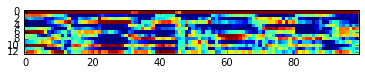

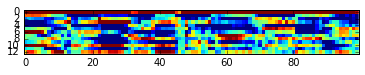

In [315]:
plt.imshow(y_pred.T, interpolation='none', vmin=-20, vmax=20)
plt.show()
plt.imshow(lifter_out[200:300].T, interpolation='none', vmin=-20, vmax=20)
plt.show()

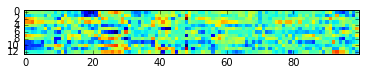

In [317]:
plt.imshow(y_pred.T - lifter_out[200:300].T, interpolation='none')
plt.show()

# Finally combining everything

In [20]:
inputs = Input(shape=(400,1), name='input', dtype='float32')
# Pre-emphasis
x = Conv1D(128, 5, activation='relu', padding='same', name='preemph_1')(inputs)
x = Conv1D(1, 1, padding='same', name='preemph_2')(x)
output_preemph = Flatten()(x)

model_preemph = Model(inputs=inputs, outputs=output_preemph)
sgd = SGD(lr=0.05)
model_preemph.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])

In [22]:
model_preemph.fit(np.expand_dims(p_norm_in, axis=2), p_norm_out)

Epoch 1/1
   4128/1128519 [..............................] - ETA: 1360s - loss: 0.0177 - mean_absolute_error: 0.0334 - mean_squared_error: 0.0177

KeyboardInterrupt: 

In [36]:
# FFT
norm_constant = np.float32(preemph_out_std)
x = Lambda(lambda x: x * norm_constant, name='fft_denorm')(output_preemph)
output_fft = FftLayer(trainable=False, name='fft')(x)
# Filterbanks
x = Lambda(lambda x: K.log(x + 0.01), name='fbank_lognorm')(output_fft)
x = Dense(512, activation='relu', name='fbank_1')(x)
x = Dense(512, activation='relu', name='fbank_2')(x)
output_logfbank = Dense(26, activation='linear', name='fbank_3')(x)

model_fft = Model(inputs=inputs, outputs=output_logfbank)
sgd = SGD(lr=0.001)
model_fft.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])


In [63]:
for l in model_fft.layers[:4]:
    l.trainable = False
    
model_fft.fit(np.expand_dims(p_norm_in, axis=2).astype(np.float32), log_fbanks_out.astype(np.float32))

Epoch 1/1
   7232/1128519 [..............................] - ETA: 955s - loss: 0.6559 - mean_absolute_error: 0.6242 - mean_squared_error: 0.6559

KeyboardInterrupt: 

In [64]:
for l in model_fft.layers:
    l.trainable=False

In [65]:
x = DCTLayer(numcep=13, norm='ortho', trainable=False, input_shape=(26,), name='dct')(output_logfbank)
x = Dense(512, activation='relu', name='lifter_1')(x)
x = Dense(512, activation='relu', name='lifter_2')(x)
lifter_out = Dense(12, activation='linear', name='lifter_3')(x)

model_lifter = Model(inputs=inputs, outputs=lifter_out)
sgd = SGD(lr=0.001)
model_lifter.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])

In [67]:
model_lifter.

False
False
False
False
False
False
False
False
False
False
False
True
True
True


In [ ]:
for l in model_fft.layers[:4]:
    l.trainable = False
    
model_fft.fit(np.expand_dims(p_norm_in, axis=2).astype(np.float32), log_fbanks_out.astype(np.float32))

In [60]:
x = Dense(1, activation='linear', input_dim=257, kernel_initializer='ones', bias_initializer='zeros', trainable=False)(output_fft)
energy_out = Lambda(lambda x: K.log(x))(x)

/vol/customopt/keras/keras/layers/core.py:640: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [61]:
mfcc_out = concatenate([energy_out, lifter_out])

model_mfcc = Model(inputs=inputs, outputs=mfcc_out)
sgd = SGD(lr=0.001)
model_mfcc.compile(loss='mean_squared_error', optimizer=sgd, metrics=[metrics.mae, metrics.mse])

In [62]:
model_mfcc.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 400, 1)        0                                            
____________________________________________________________________________________________________
preemph_1 (Conv1D)               (None, 400, 128)      768                                          
____________________________________________________________________________________________________
preemph_2 (Conv1D)               (None, 400, 1)        129                                          
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 400)           0                                            
___________________________________________________________________________________________